# Breast Cancer Classification<br>
### Lakshya Garg<br> 211000027

In [29]:
# import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Load the dataset
data = pd.read_csv('data.csv')

In [31]:
# Remove the unnecessary columns
data = data.drop(['id', 'Unnamed: 32'], axis=1)

In [32]:
# Map the diagnosis column to binary values
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

In [33]:
# Split the dataset into features and target
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

# Create an instance of the logistic regression classifier
lr = LogisticRegression()

# Perform 5-fold cross-validation and get the predicted values
y_pred = cross_val_predict(lr, X, y, cv=5)

In [34]:
# Calculate the confusion matrix
cm = confusion_matrix(y, y_pred)
print('Confusion Matrix:\n', cm)


Confusion Matrix:
 [[347  10]
 [ 22 190]]


In [35]:
# Calculate the accuracy, precision, recall, and f1-score
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1-score:', f1)


Accuracy: 0.9437609841827768
Precision: 0.95
Recall: 0.8962264150943396
F1-score: 0.9223300970873787


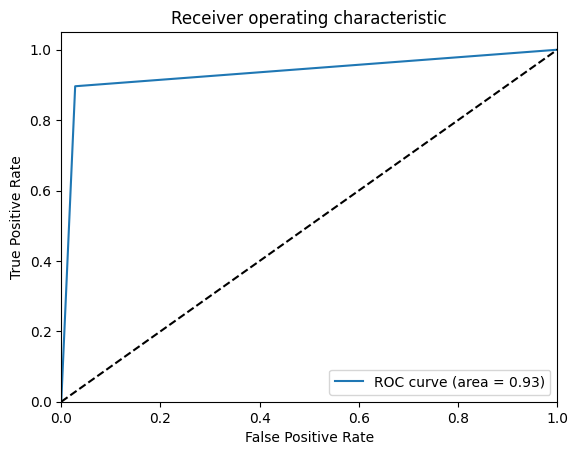

In [36]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()